## Raymond Tang Jupyter Notebook

In [1]:
# NOTE: typically import libraries for data
import numpy as np
import pandas as pd
import json
# and libraries for visualizing/plotting the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the CSV dataset
apw_all_domains_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-all-domains-30-days.csv')
apw_all_pages_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-all-pages-realtime.csv')
apw_browsers_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-browsers.csv')
apw_device_model_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-device_model.csv')
apw_devices_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-devices.csv')
apw_languages_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-language.csv')
apw_os_browsers_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-os-browsers.csv')
apw_os_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-os.csv')
apw_screen_size_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-screen-size.csv')
apw_top_downloads_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-top-downloads-yesterday.csv')
apw_top_exit_pages_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-top-exit-pages-30-days.csv')
apw_top_sources_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-top-traffic-sources-30-days.csv')
apw_windows_browsers_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-windows-browsers.csv')
apw_windows_ie_df = pd.read_csv('dataset-20220715-1102/all-participating-websites/apw-windows-ie.csv')

# load the JSON dataset
apw_realtime_data = json.load(open('dataset-20220715-1102/all-participating-websites/apw-realtime.json'))
apw_total_people_online_df = pd.DataFrame(apw_realtime_data["data"])
apw_top_cities_realtime_data = json.load(open('dataset-20220715-1102/all-participating-websites/apw-top-cities-realtime.json'))
apw_top_cities_df = pd.DataFrame(apw_top_cities_realtime_data["data"])
apw_top_countries_realtime_data = json.load(open('dataset-20220715-1102/all-participating-websites/apw-top-countries-realtime.json'))
apw_top_countries_df = pd.DataFrame(apw_top_countries_realtime_data["data"])

Primary dataset to look at are:
1. Visits to all domains over 30 days - Daily
2. Top downloads yesterday - Daily
3. Top traffic sources (30 days) - Daily
4. Top exit pages (30 days) - Daily
5. All pages people are visiting - Every 5 minutes
6. Total people online - Every 5 minutes

# All Domains in 30 days

In [3]:
apw_all_domains_df.head()

,domain,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
0,tools.usps.com,201565684,297186721,70361109,1.474391,110.546552,204107702
1,ncbi.nlm.nih.gov,116357808,208858667,67275495,1.794969,167.491075,115085228
2,pubmed.ncbi.nlm.nih.gov,87724756,301764867,44898510,3.439905,260.896629,89382253
3,cdc.gov,75578687,124580875,54653386,1.648360,87.112481,75415294
4,reg.usps.com,64582652,90505580,21153109,1.401392,44.441142,58070499


In [4]:
apw_all_domains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   domain                 3177 non-null   object 
 1   visits                 3177 non-null   int64  
 2   pageviews              3177 non-null   int64  
 3   users                  3177 non-null   int64  
 4   pageviews_per_session  3177 non-null   float64
 5   avg_session_duration   3177 non-null   float64
 6   exits                  3177 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.9+ KB


### Data Cleansing 

In [5]:
apw_all_domains_df.avg_session_duration.value_counts()

0.000000      673
1.000000       11
2.000000       11
5.000318        8
9.000637        6
             ... 
23.162240       1
172.730329      1
135.784259      1
22.189265       1
125.007002      1
Name: avg_session_duration, Length: 2274, dtype: int64

In [6]:
print(apw_all_domains_df.shape)
# Dropping website domains without at least 1-min of average session duration
apw_all_domains_df = apw_all_domains_df[apw_all_domains_df.avg_session_duration > 1]
print(apw_all_domains_df.shape)
# Dropping website domains which has no a single exit count
apw_all_domains_df = apw_all_domains_df[apw_all_domains_df.exits > 0]
print(apw_all_domains_df.shape)

(3177, 7)
(2464, 7)
(2433, 7)


In [7]:
apw_all_domains_df

,domain,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
0,tools.usps.com,201565684,297186721,70361109,1.474391,110.546552,204107702
1,ncbi.nlm.nih.gov,116357808,208858667,67275495,1.794969,167.491075,115085228
2,pubmed.ncbi.nlm.nih.gov,87724756,301764867,44898510,3.439905,260.896629,89382253
3,cdc.gov,75578687,124580875,54653386,1.648360,87.112481,75415294
4,reg.usps.com,64582652,90505580,21153109,1.401392,44.441142,58070499
...,...,...,...,...,...,...,...
3146,videos.fisheries.noaa.gov,1571,1571,1571,1.000000,13.000637,1571
3162,whitesands.armymwr.com,1571,4713,1571,3.000000,15.000637,1571
3169,www-robotics.jpl.nasa.gov,1571,3142,1571,2.000000,32.001910,1571
3172,www7.transportation.gov,1571,6284,3142,4.000000,26.001273,3142


Note: After cleaning the dataset, it went down from 3177 entries to 2464 entries

### Top 10 domains with most visits

In [8]:
top10_domains_visits = apw_all_domains_df.sort_values(by=['visits'], ascending=False)[['domain', 'visits']].iloc[0:10]

### Top 10 domains with most exits 

In [9]:
top10_domains_exits = apw_all_domains_df.sort_values(by=['exits'], ascending=False)[['domain', 'exits']].iloc[0:10]

### Top 10 domains with most pageviews

In [10]:
top10_domains_pageviews = apw_all_domains_df.sort_values(by=['pageviews'], ascending=False)[['domain', 'pageviews']].iloc[0:10]

### Top 10 domains with most users

In [11]:
top10_domains_users = apw_all_domains_df.sort_values(by=['users'], ascending=False)[['domain', 'users']].iloc[0:10]

### Top 10 domains with longest average duration

In [12]:
top10_domains_duration = apw_all_domains_df.sort_values(by=['avg_session_duration'], ascending=False)[['domain', 'avg_session_duration']].iloc[0:10]

### Top 10 domains visits vs exits

In [13]:
top10_domains_visits_vs_exits_df = pd.concat([top10_domains_visits, top10_domains_exits], axis=0)


In [14]:
top10_domains_visits_vs_exits_df = top10_domains_visits_vs_exits_df.groupby("domain").sum().sort_values(by=['visits'], ascending=False).reset_index().melt("domain", var_name="type",value_name="count")

### Plots

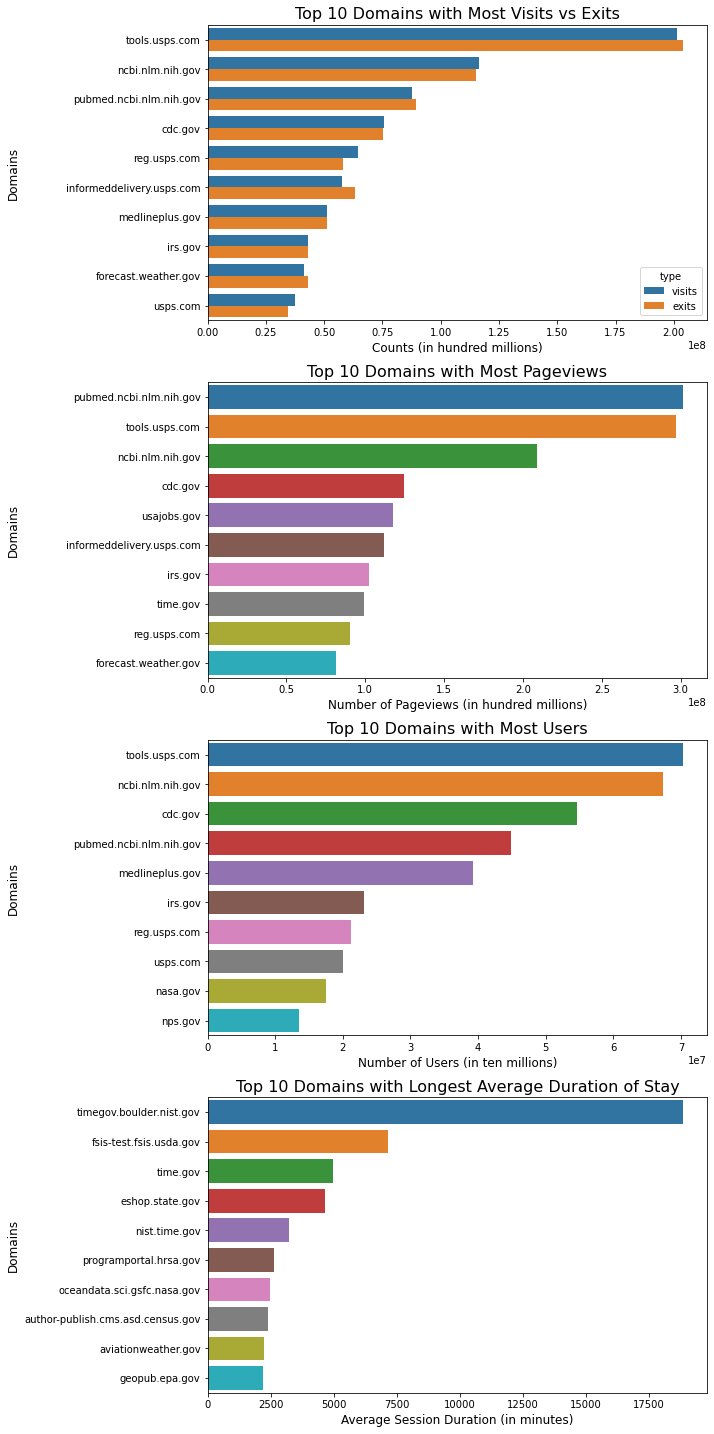

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))
fig.align_labels()

'''
sns.barplot(x='domain', y='visits', data=top10_domains_visits, ax = ax[0][0])
ax[0][0].set_ylim(ymin=0, ymax=210000000)
ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation = 90)
ax[0][0].set_title("Top 10 Domains with Most Visits vs Exits", fontdict={'fontsize':16})
ax[0][0].set_xlabel("Domains", fontdict={'fontsize':12})
ax[0][0].set_ylabel("Number of Visits (in hundred millions)", fontdict={'fontsize':12})
ax2 = ax[0][0].twinx()
ax2.set_ylim(ymin=0, ymax=210000000)
sns.lineplot(x='domain', y='exits', data=top10_domains_exits, ax = ax2, color='r')
'''

sns.barplot(x='count', y='domain', hue='type', data=top10_domains_visits_vs_exits_df, ax = ax[0])
#ax[0].set_xticklabels(ax[0][0].get_xticklabels(), rotation = 90)
ax[0].set_title("Top 10 Domains with Most Visits vs Exits", fontdict={'fontsize':16})
ax[0].set_ylabel("Domains", fontdict={'fontsize':12})
ax[0].set_xlabel("Counts (in hundred millions)", fontdict={'fontsize':12})

sns.barplot(x='pageviews', y='domain', data=top10_domains_pageviews, ax = ax[1])
#ax[1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 90)
ax[1].set_title("Top 10 Domains with Most Pageviews", fontdict={'fontsize':16})
ax[1].set_ylabel("Domains", fontdict={'fontsize':12})
ax[1].set_xlabel("Number of Pageviews (in hundred millions)", fontdict={'fontsize':12})

sns.barplot(x='users', y='domain', data=top10_domains_users, ax = ax[2])
#ax[2].set_xticklabels(ax[1][0].get_xticklabels(), rotation = 90)
ax[2].set_title("Top 10 Domains with Most Users", fontdict={'fontsize':16})
ax[2].set_ylabel("Domains", fontdict={'fontsize':12})
ax[2].set_xlabel("Number of Users (in ten millions)", fontdict={'fontsize':12})

sns.barplot(x='avg_session_duration', y='domain', data=top10_domains_duration, ax = ax[3])
#ax[3].set_xticklabels(ax[1][1].get_xticklabels(), rotation = 90)
ax[3].set_title("Top 10 Domains with Longest Average Duration of Stay", fontdict={'fontsize':16})
ax[3].set_ylabel("Domains", fontdict={'fontsize':12})
ax[3].set_xlabel("Average Session Duration (in minutes)", fontdict={'fontsize':12})

plt.tight_layout(pad=1)
plt.show()

# Top Download Yesterday

In [16]:
apw_top_downloads_df

,page_title,event_label,page,total_events
0,"About Form W-9, Request for Taxpayer Identific...",https://www.irs.gov/pub/irs-pdf/fw9.pdf,irs.gov/forms-pubs/about-form-w-9,15969
1,Renew my U.S. passport,https://eforms.state.gov/Forms/ds82.pdf,travel.state.gov/content/travel/en/passports/h...,10979
2,Employment Eligibility Verification | USCIS,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-9,10744
3,Employment Eligibility Verification | USCIS,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-9,10157
4,Passport Forms,https://eforms.state.gov/Forms/ds11.pdf,travel.state.gov/content/travel/en/passports/h...,9276
...,...,...,...,...
95,Passport Forms,https://eforms.state.gov/Forms/ds3053.pdf,travel.state.gov/content/travel/en/passports/h...,1115
96,SDO | Solar Dynamics Observatory,https://sdo.gsfc.nasa.gov/assets/img/latest/la...,sdo.gsfc.nasa.gov/data/,1115
97,"About Schedule C (Form 1040), Profit or Loss f...",https://www.irs.gov/pub/irs-pdf/f1040sc.pdf,irs.gov/forms-pubs/about-schedule-c-form-1040,1057
98,Application to Register Permanent Residence or...,https://www.uscis.gov/sites/default/files/docu...,uscis.gov/i-485,1057


### Data Cleansing 

In [17]:
import re 

def extract_file_name_from_url(my_str):
    new_str = re.sub('^http.*\/', '', my_str)
    new_str = re.sub('-paper-version', '', new_str)
    new_str = re.sub('PDF', 'pdf', new_str)
    return new_str


In [18]:
apw_top_downloads_df['file_name'] = apw_top_downloads_df.event_label.apply(extract_file_name_from_url)

In [19]:
rank_by_download_file_df = apw_top_downloads_df.groupby("file_name").sum().sort_values(by=['total_events'], ascending=False).head(10)

### Plots

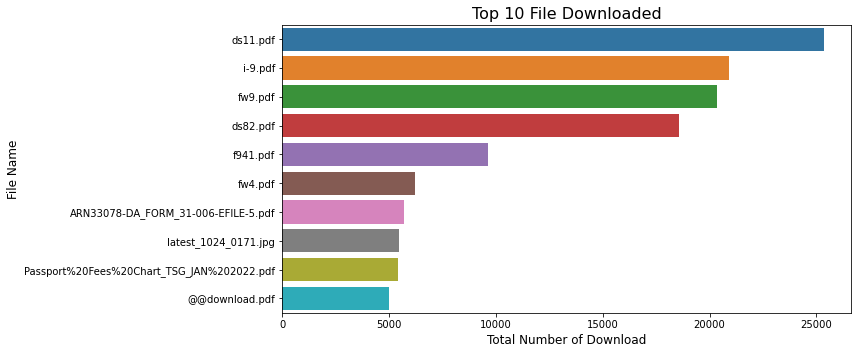

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
fig.align_labels()
sns.barplot(x='total_events', y=rank_by_download_file_df.index, data=rank_by_download_file_df, ax = ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Top 10 File Downloaded", fontdict={'fontsize':16})
ax.set_xlabel("Total Number of Download", fontdict={'fontsize':12})
ax.set_ylabel("File Name", fontdict={'fontsize':12})
plt.tight_layout(pad=1)
plt.show()

# Top Traffic Sources

In [21]:
apw_top_sources_df.head(10)

,source,has_social_referral,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
0,google,No,631518116,1270053321,384205085,2.011111,141.475560,629710408
1,(direct),No,366303638,854530645,226926192,2.332848,145.560961,365024490
2,reg.usps.com,No,71337366,133843307,13939733,1.876202,66.130139,71130250
3,usps.com,No,38077856,74069640,14299286,1.945216,117.232278,37927075
4,bing,No,34319944,90789697,19526893,2.645392,191.312798,34157565
5,informeddelivery.usps.com,No,32489039,42162183,6004706,1.297736,22.639586,32465842
6,weather.gov,No,21516863,62762765,3462979,2.916911,210.243188,21488696
7,pubmed.ncbi.nlm.nih.gov,No,18221234,113116798,4536668,6.207966,536.769486,18217920
8,forecast.weather.gov,No,13926477,25538227,1401761,1.833789,122.303633,13913222
9,eauth.va.gov,No,10100631,35391976,2496990,3.503937,144.586783,10094004


In [22]:
print(apw_top_sources_df.shape)
# Dropping website domains without at least 1-min of average session duration
apw_top_sources_df = apw_top_sources_df[apw_top_sources_df.avg_session_duration > 1]
print(apw_top_sources_df.shape)

# Dropping website domains which has no a single exit count
apw_top_sources_df = apw_top_sources_df[apw_top_sources_df.exits > 0]
print(apw_top_sources_df.shape)


(20, 8)
(20, 8)
(20, 8)


In [23]:
apw_top_sources_df[apw_top_sources_df.has_social_referral=='Yes']

,source,has_social_referral,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
13,m.facebook.com,Yes,7187752,10332601,6115720,1.437529,53.461737,7184439


In [24]:
top10_sources_visits = apw_top_sources_df.sort_values(by=['visits'], ascending=False)[['source', 'visits']].iloc[0:10]

In [25]:
top10_sources_exits = apw_top_sources_df.sort_values(by=['exits'], ascending=False)[['source', 'exits']].iloc[0:10]

In [26]:
top10_sources_visits_vs_exits_df = pd.concat([top10_sources_visits, top10_sources_exits], axis=0)
top10_sources_visits_vs_exits_df = top10_sources_visits_vs_exits_df.groupby("source").sum().sort_values(by=['visits'], ascending=False).reset_index().melt("source", var_name="type",value_name="count")

### Plots

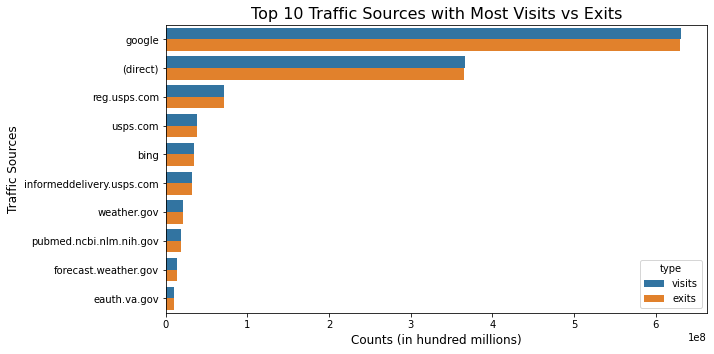

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
fig.align_labels()

sns.barplot(x='count', y='source', hue='type', data=top10_sources_visits_vs_exits_df, ax = ax)
#ax.set_xticklabels(ax[0][0].get_xticklabels(), rotation = 90)
ax.set_title("Top 10 Traffic Sources with Most Visits vs Exits", fontdict={'fontsize':16})
ax.set_ylabel("Traffic Sources", fontdict={'fontsize':12})
ax.set_xlabel("Counts (in hundred millions)", fontdict={'fontsize':12})

plt.tight_layout(pad=1)
plt.show()

# Top Exit Pages

In [28]:
apw_top_exit_pages_df

,exit_page,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
0,(other),120176344,335091036,89688740,2.788328,163.392617,120219034
1,ncbi.nlm.nih.gov/ncbi_pmc-frontend_pmc_article,94849348,151144689,57768403,1.593524,137.775912,94849348
2,tools.usps.com/go/trackconfirmaction_input,87119097,118105011,32389319,1.355673,91.283974,87119097
3,pubmed.ncbi.nlm.nih.gov/ncbi_pubmed_pubmed_abs...,77501230,222148153,39831894,2.866382,250.289756,77501230
4,tools.usps.com/go/trackconfirmaction,75639243,126163140,26055707,1.667959,132.026142,75639243
5,forecast.weather.gov/mapclick.php,40524696,72327922,8636621,1.784786,117.070071,40524696
6,informeddelivery.usps.com/box/pages/secure/das...,26037009,57021851,5457126,2.190031,52.369057,26037009
7,tools.usps.com/go/trackconfirmaction.action,24403341,32546824,9389583,1.333704,85.375144,24403341
8,reg.usps.com/entreg/loginaction_input,24110212,35492243,14960589,1.472083,40.278786,24110212
9,secure.login.gov/,23316229,52959714,10129848,2.271367,849.364985,23316229


# Total People Online Realtime

In [29]:
apw_total_people_online_df

,active_visitors
0,6981


# All Pages People are Visiting Realtime

In [30]:
apw_all_pages_df

,page,page_title,active_visitors
0,cdc.gov/coronavirus/2019-ncov/science/communit...,COVID-19 Community Levels | CDC,671
1,tools.usps.com/go/trackconfirmaction_input,USPS.com® - USPS Tracking® Results,343
2,secure.login.gov/,Welcome - Login.gov,321
3,ncbi.nlm.nih.gov/ncbi_pmc-frontend_pmc_article,NCBI pmc-frontend:pmc:article,267
4,covid.cdc.gov/covid-data-tracker/,CDC COVID Data Tracker,262
...,...,...,...
1333,weather.gov/erh/ghwo,Experimental Graphical Hazardous Weather Outlook,10
1334,weather.gov/rah/,"Raleigh, NC",10
1335,whitehouse.gov/briefing-room/statements-releas...,FACT SHEET: President Biden to Sign Executive ...,10
1336,whitehouse.gov/covidplan/,National COVID-19 Preparedness Plan | The Whit...,10


# Analysis for Postal Service Departmental Websites

In [32]:
'''

fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
fig.align_labels()

solar_df['Solar_kW'].hist(ax=ax[0], bins= 400)
solar_df.plot.scatter(ax=ax[1], x='Bldg_sqft', y='Solar_kW')

ax[0].set_title("Histogram of Solar Array Size (kW)")
ax[0].set_xlabel("Size of Array in kW")
ax[0].set_ylabel("Number of Arrays")
ax[0].axvline(x=solar_df['Solar_kW'].mean(), color='orange')

ax[1].set_title("Building Square Footage (sqft) vs Solar Array Size (kW)")
ax[1].set_xlabel("Building Square Footage (sqft)")
ax[1].set_ylabel("Solar Array Size (kW)")

plt.tight_layout(pad=1)
plt.show()

fig=plt.figure(figsize = (15,10))
ax=sns.barplot(x='Country_Name', y='2016', data=largest10in2016)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

'''
pass